## **Notebook EC#06**
## Linear and nonlinear dimensionality reduction techniques for data visualization.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula


##### **Please, make the upload of the dataset [coil20.csv] before executing the code.**

**This notebook will first show how to visualize data with more than three features using the scatter plot matrix. Then we apply linear and nonlinear dimensionality reduction techniques, more specifically PCA, t-SNE and UMAP, to get 2D/3D representation of our data, and visualize the results with 2D scatter plots and 3D scatter plots. We are going to focus on: (Part 1) The popular IRIS dataset; (Part 2) The MNIST dataset; and (Part 3) The COIL20 dataset. This content is based on [this material](https://plotly.com/python/pca-visualization/) and also on [this material](https://plotly.com/python/t-sne-and-umap-projections/).**

In [3]:
# Loading the main libraries
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# **Part 1 - IRIS dataset**

### **Pairwise visualization of all the original dimensions**

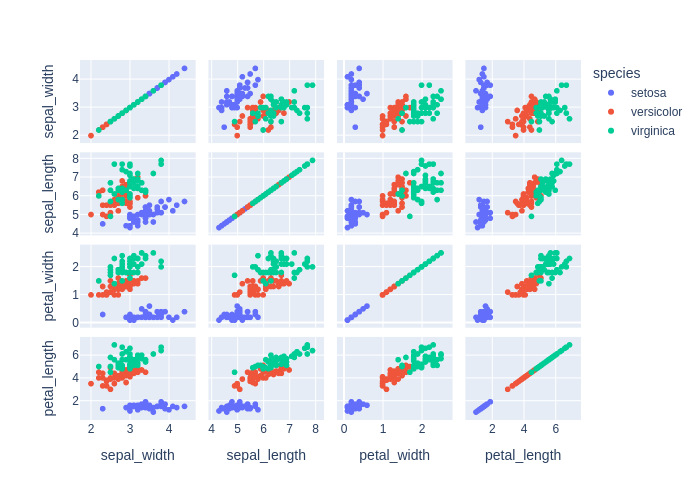

In [4]:
df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show("png") # for github

### **2D projection using the first 2 PCA components**
#### Notice the use of normalization on the dataset.

[0.72962445 0.22850762]


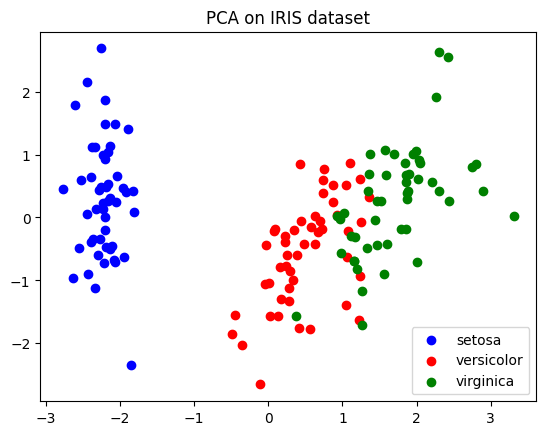

In [5]:
iris = datasets.load_iris()

X = iris.data
X_standard = StandardScaler().fit_transform(X)
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X_standard).transform(X_standard)

# Percentage of variance explained for each components
print(pca.explained_variance_ratio_)

pl.figure()
for c, i, target_name in zip("brg", [0, 1, 2], target_names):
    pl.scatter(X_r[y==i,0], X_r[y==i,1], c=c, label=target_name)
pl.legend()
pl.title('PCA on IRIS dataset')

pl.show()

### **Participation of the original features in the first 2 PCA components**

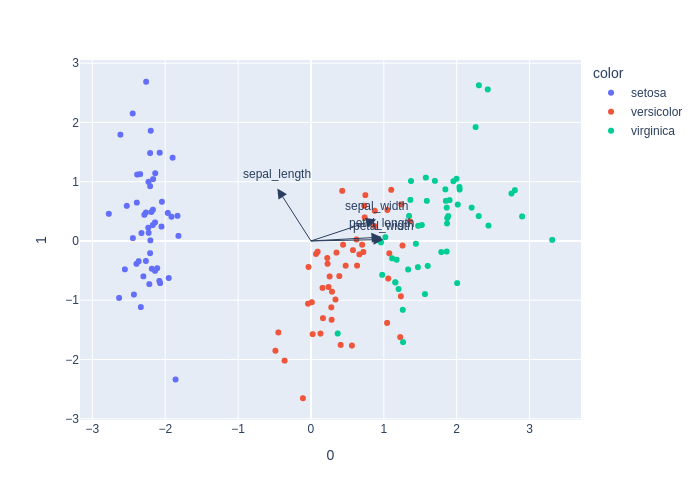

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_standard)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show("png")

### **Pairwise visualization of all the PCA components**

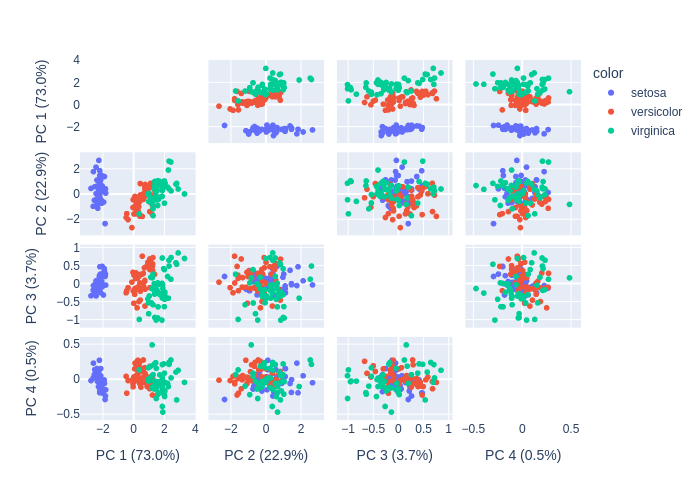

In [7]:
pca = PCA()
components = pca.fit_transform(X_standard)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show("png")

### **Cumulative explained variance of the PCA components**

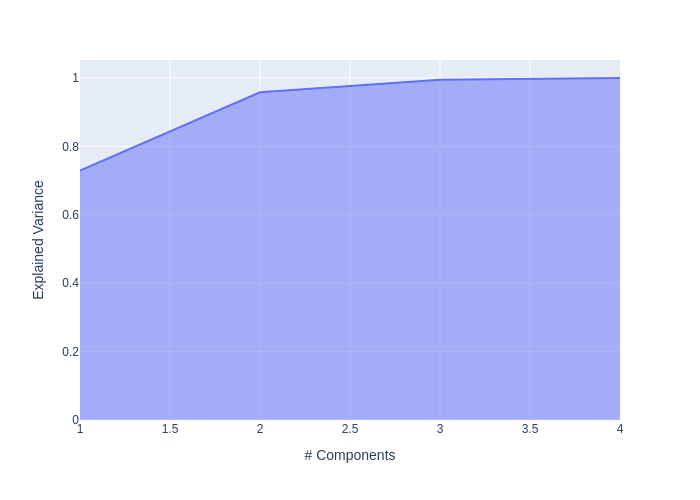

In [8]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

fig.show("png")

### **3D projection using the first 3 PCA components**

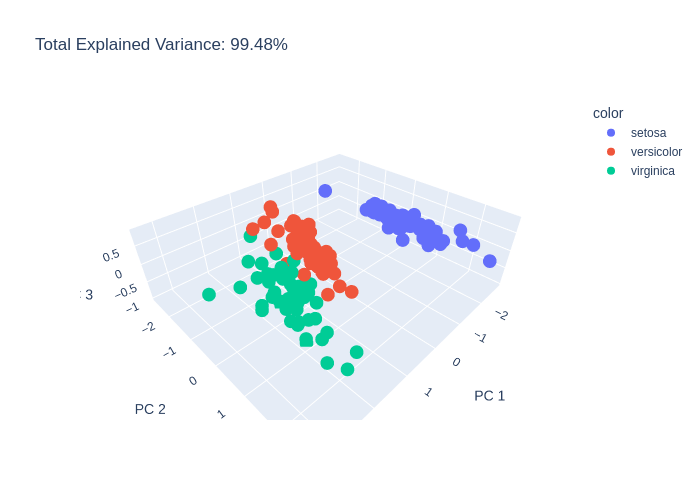

In [9]:
pca = PCA(n_components=3)
components = pca.fit_transform(X_standard)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show("png")

### **2D projection with t-SNE**

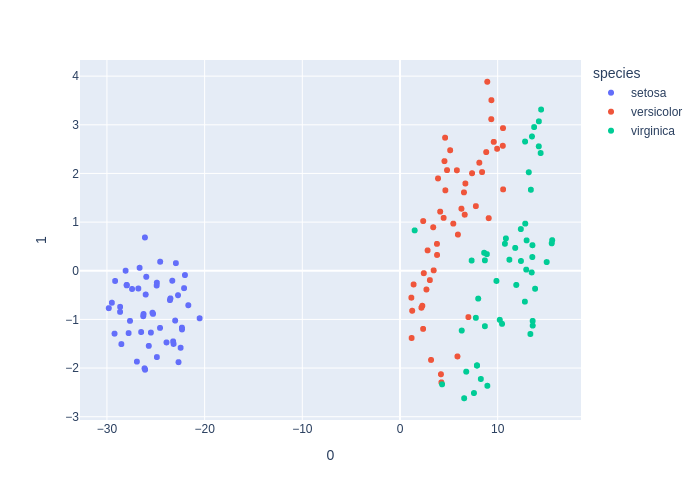

In [10]:
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X_standard)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show("png")

### **3D projection with t-SNE**

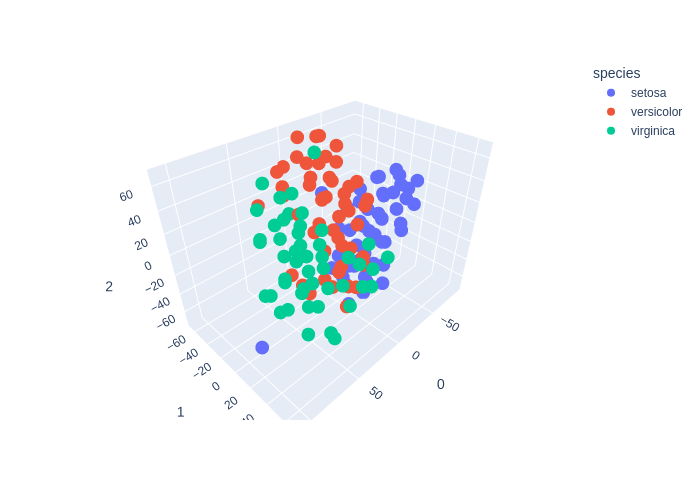

In [11]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(X_standard)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show("png")

### **2D projection with UMAP**

 <i>**Embora o UMAP requeira uma sintonia cuidadosa de dois de seus hiperparâmetros, [n_neighbors] e [min_dist] (veja [aqui](https://pair-code.github.io/understanding-umap/) ou [aqui](https://umap-learn.readthedocs.io/en/latest/parameters.html)), essa sintonia não será realizada, sendo usados os valores default [n_neighbors = 15] e [min_dist = 0.1] ou outros valores arbitrários, dependendo do caso de estudo e dos objetivos de visualização.**</i>

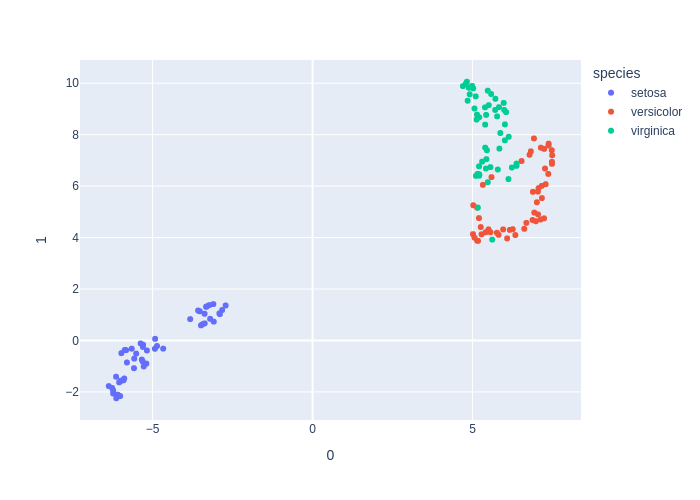

In [12]:
from umap import UMAP
warnings.filterwarnings('ignore', category=UserWarning)

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X_standard)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)

fig_2d.show("png")

### **3D projection with UMAP**

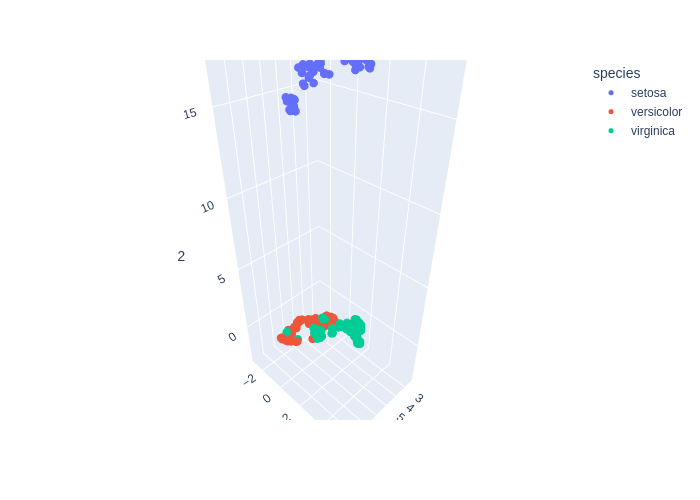

In [13]:
warnings.filterwarnings('ignore', category=UserWarning)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_3d = umap_3d.fit_transform(X_standard)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_3d.show("png")

# **Part 2 - MNIST dataset**

### **2D projection with PCA**

[0.05642719 0.04041226]


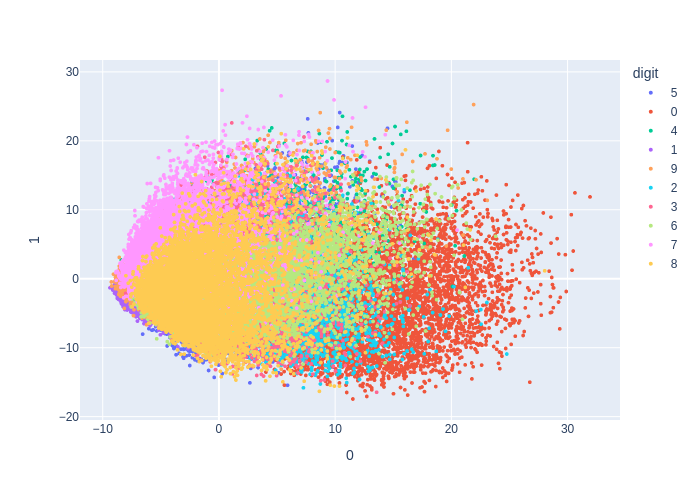

In [14]:
from sklearn.datasets import fetch_openml # Use fetch_openml to load the MNIST dataset

# Load the MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract the data and target
digits = mnist.data
digits_standard = StandardScaler().fit_transform(digits)
targets = mnist.target

pca = PCA(n_components=2)
projections = pca.fit_transform(digits_standard)

# Percentage of variance explained for each components
print(pca.explained_variance_ratio_)

fig = px.scatter(
    projections, x=0, y=1,
    color=targets.astype(str), labels={'color': 'digit'}
)
fig.update_traces(marker=dict(size=4))
fig.show("png")

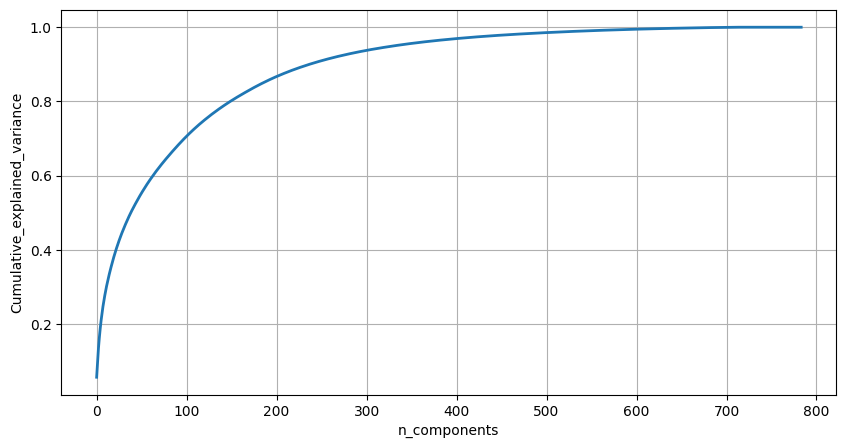

In [15]:
pca = PCA()

pca.n_components = 784
pca_data = pca.fit_transform(digits_standard)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show("png")

<font color="green">
Atividade (a) <br>
Conferindo os dois gráficos acima, associados à projeção PCA, procure apresentar o motivo pelo qual são necessários aproximadamente 150 componentes principais para conseguir explicar 80% da variedade da base MNIST, algo completamente distinto do cenário observado na Parte 1 (base de dados IRIS).<br>
</font>

Resposta: <br>

In [16]:
print(f"Dimensão MNIST: {digits.shape[1]}\nDimensão IRIS: {X.shape[1]}")

Dimensão MNIST: 784
Dimensão IRIS: 4


A dimensão dos dados. A base MNIST é composta por imagens 28x28 pixels, o que resulta em um vetor de dimensão 784. Já a base IRIS possui apenas 4 features - comprimento e largura de pétalas e sépalas - que são facilmente descritas em poucos componentes principais (95% de variância explicada com 2 componentes principais).  

### **2D projection with UMAP**
#### Notice that no normalization is performed here, given that the clustering results are ok for the hyperparameters considered.

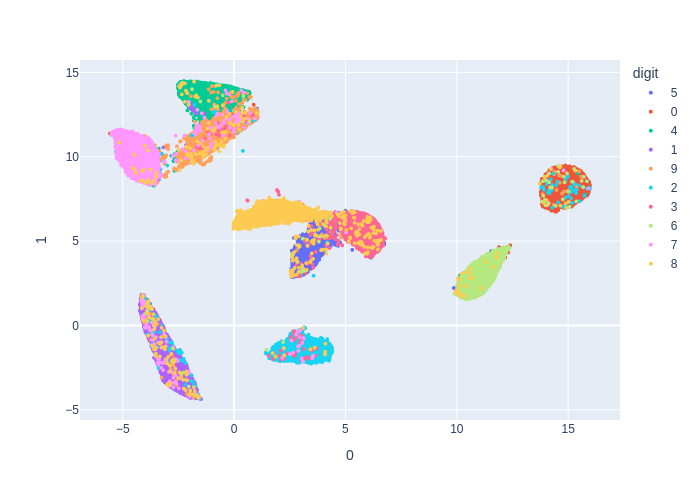

In [17]:
# Load the MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract the data and target
digits = mnist.data
targets = mnist.target

projections = UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
).fit_transform(digits)

fig = px.scatter(
    projections, x=0, y=1,
    color=targets.astype(str), labels={'color': 'digit'}
)
fig.update_traces(marker=dict(size=4))
fig.show("png")

<font color="green">
Atividade (b) <br>
Com base no resultado de projeção 2D apresentado logo acima, com a técnica UMAP para a base MNIST, como você defenderia a adoção de um gargalo de 2 dimensões (código 2D) para um autoencoder que deve ser treinado com a base MNIST? Como você sustentaria a afirmação prévia de que esse autoencoder com código 2D tende a apresentar alguns erros de reconstrução para a base MNIST, após o treinamento?<br>
</font>

**Resposta:** <br>
É possível defender o uso de um código 2D quando consideramos que dados com 784 dimensões estão significativamente bem representados em duas dimensões. É relevante observar que essa drástica redução de dimensionalidade forçará o autoencoder a capturar as relações mais fortes entre os dados e isso pode ser um ponto positivo. De fato, é evidente que a separação entre as classes não será total e, eventualmente, erros de reconstrução acontecerão. Porém, dada a complexidade original dos dados, a simplicidade da solução em 2D é bem válida.<br>
Ademais, vale destacar que o mapeamento dos dados - e, consequentemente, separação das classes - ocorre de formas distintas. O autoencoder, muito provavelmente, mapeou os dados em seu espaço latente de uma forma diferente - em algum grau, certamente é diferente - do que a técnica UMAP, pois o autoencoder é treinado recebendo feedback sobre a reconstrução dos dados, enquanto que UMAP busca separar os dados e manter a estrutura topológica dos mesmos. Logo, formas distintas de aprender os dados podem resultar em diferenças - possivelmente positivas - que valham a pena ser exploradas e possam justificar essa adoção do código 2D.

# **Part 3 - Columbia University Image Library (COIL-20) dataset**
#### The dataset is presented [here](https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php) and the CSV file can be downloaded [here](https://github.com/akmand/datasets/blob/main/coil20.csv).

#### **Please, make the upload of the dataset [coil20.csv] before executing the code.**

In [18]:
images = pd.read_csv('data/coil20.csv')

print('The size of the dataset is:', images.shape)

The size of the dataset is: (1440, 1025)


In [19]:
# Labels represent the last column of the CSV file
targets = np.array(images['1025'])

# Remove the labels from the features: [axis = 1] refers to the columns
features = images.drop(['1025'], axis = 1)

In [20]:
print(targets.shape)
print(features.shape)

(1440,)
(1440, 1024)


### **2D projection with PCA**

[0.21451262 0.13298392]


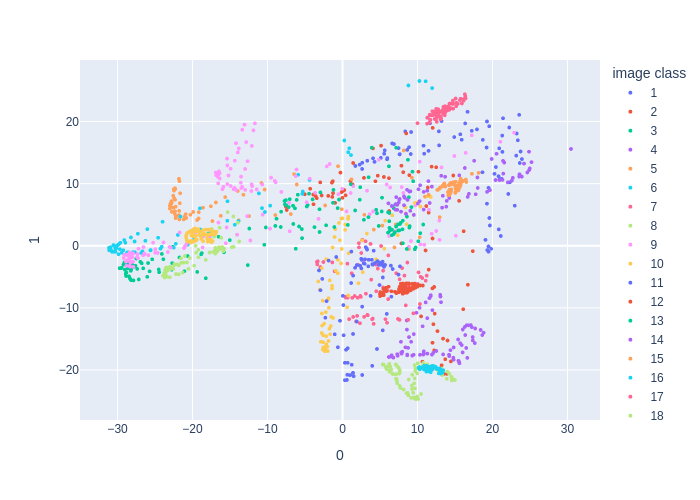

In [21]:
features_standard = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
projections = pca.fit_transform(features_standard)

# Percentage of variance explained for each components
print(pca.explained_variance_ratio_)

fig = px.scatter(
    projections, x=0, y=1,
    color=targets.astype(str), labels={'color': 'image class'}
)
fig.update_traces(marker=dict(size=4))
fig.show("png")

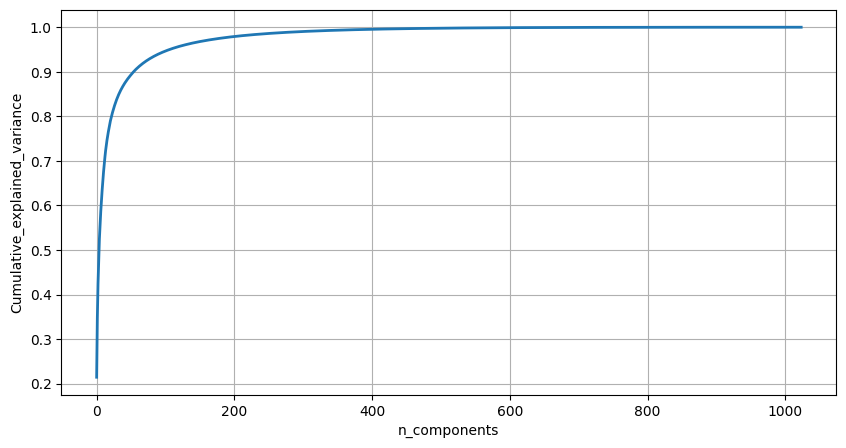

In [22]:
pca = PCA()

pca.n_components = 1024
pca_data = pca.fit_transform(features_standard)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### **2D projection with UMAP**
#### Notice that no normalization is performed here, given that the clustering results are ok for the hyperparameters considered.

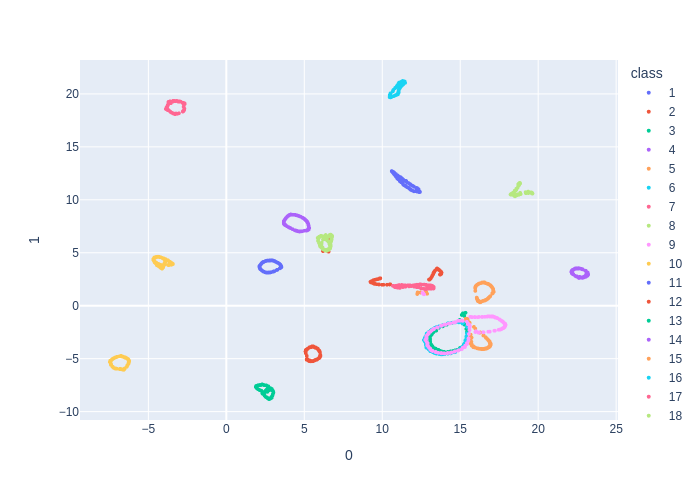

In [23]:
projections = UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
).fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=targets.astype(str), labels={'color': 'class'}
)
fig.update_traces(marker=dict(size=4))

fig.show("png")

<font color="green">
Atividade (c) <br>
Conferindo as imagens de cada classe (consulte o link de apresentação do dataset https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php), procure justificar o fato de a projeção UMAP ter separado muito bem muitas das 20 classes (o que é indicado por pontos de mesma cor plotados bem próximos e isolados de pontos de outra cor). Por outro lado, por que as classes 3, 6 e 19 levaram a projeções sobrepostas na figura acima?<br>
</font>

**Resposta:**

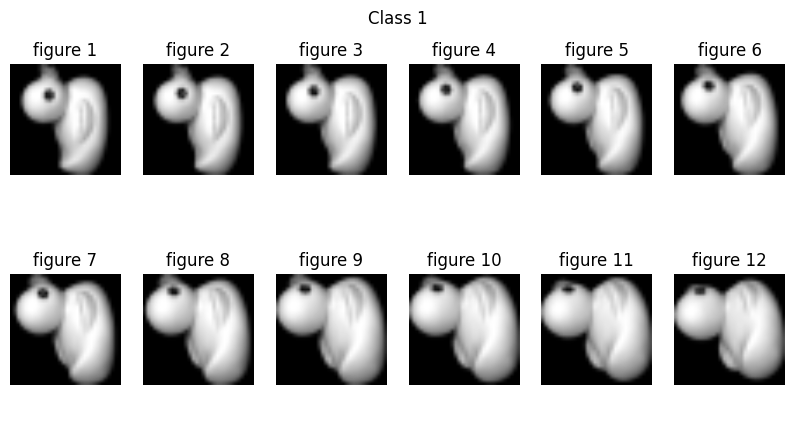

In [24]:
plot = plt.figure(figsize=(10,5))
plt.title('Class 1')
plt.axis('off')
for i in range(12):
    plt.subplot(2, 6, i+1)
    img = np.array(features[i:i+1]).reshape([32,32])
    
    plt.title(f'figure {i+1}')
    plt.imshow(img, cmap='gray', interpolation='bilinear')
    
    plt.axis('off')

O dataset coil20 é composto por conjuntos de imagens variadas - ângulos, posições, etc. - de um mesmo objeto, contendo diversos objetos. Objetos com notável distinção são facilmente identificados e devidamente separados no mapeamento 2D com UMAP - diferentemente das classes 3, 6 e 19. A imagem acima apresenta alguns exemplares de uma mesma classe que, apesar das rotações e diferentes posicionamentos, conservam características* suficientes para resultar em uma boa separação das demais. Outras classes também possuem características peculiares - texto escrito, formatos diversos, etc. - que permitem uma fácil separação.

*<i>Nota-se que, mesmo rotacionados, o olho, a estrutura da asa e o corpo da ave preservam certas características e um posicionamento semelhante no espaço. 

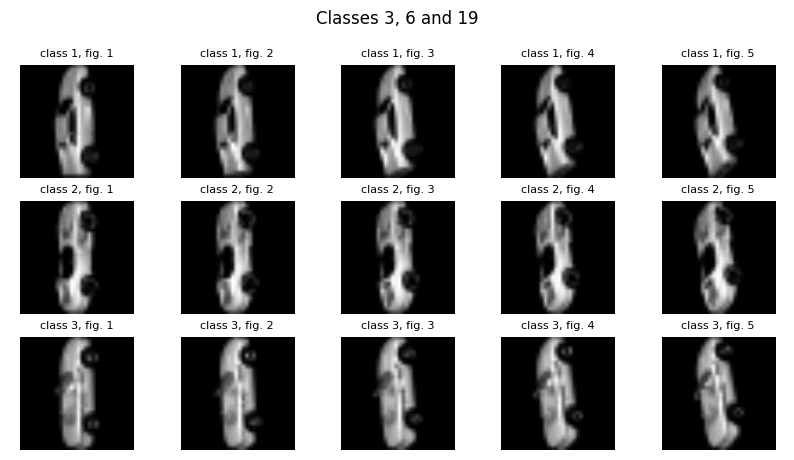

In [25]:
class_3 = images[images['1025'] == 3][:5].drop(['1025'], axis=1)
class_6 = images[images['1025'] == 6][:5].drop(['1025'], axis=1)
class_19 = images[images['1025'] == 19][:5].drop(['1025'], axis=1)

classes = pd.concat([class_3, class_6, class_19])

plot = plt.figure(figsize=(10,5))
plt.title("Classes 3, 6 and 19", pad=30)
plt.axis('off')
for i in range(15):
    plt.subplot(3, 5, i+1)
    img = np.array(classes[i:i+1]).reshape([32,32])
    if i in range(5):
        plt.title(f'class 1, fig. {i+1}').set_fontsize(8)
    elif i in range(5, 10):
        plt.title(f'class 2, fig. {i+1-5}').set_fontsize(8)
    else:
        plt.title(f'class 3, fig. {i+1-10}').set_fontsize(8)
        
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

A sobreposição das classes 3, 6 e 19 não é uma surpresa quando visualizamos exemplares de cada classe. As três classes são compostas por imagens de carros muito semelhantes, com um formato quase idêntico e as características peculiares que podem ajudar na distinção entre as classes, nesse caso são compartilhadas igualmente - por exemplo, pneus quase idênticos e na mesma posição.  